# Import Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline
from sklearn.linear_model import LinearRegression
import datetime as dt
import seaborn as sns
import time
import IPython
from scipy import stats

# Download Data Inflasi Indonesia

In [94]:
!wget download https://raw.githubusercontent.com/MochRizkyWijaya/Data-Analyst---Soal-Project-/master/Inflasi_Inflasi.csv

--2019-09-05 06:05:22--  http://download/
Resolving download (download)... failed: No address associated with hostname.
wget: unable to resolve host address ‘download’
--2019-09-05 06:05:22--  https://raw.githubusercontent.com/MochRizkyWijaya/Data-Analyst---Soal-Project-/master/Inflasi_Inflasi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3862 (3.8K) [text/plain]
Saving to: ‘Inflasi_Inflasi.csv.1’

Inflasi_Inflasi.csv 100%[===================>]   3.77K  --.-KB/s    in 0s      

2019-09-05 06:05:22 (92.7 MB/s) - ‘Inflasi_Inflasi.csv.1’ saved [3862/3862]

FINISHED --2019-09-05 06:05:22--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.8K in 0s (92.7 MB/s)


Kemudian file 'Inflasi_Inflasi.csv' diimport secara manual ke google colabs

### Membaca Data

In [0]:
data = pd.read_csv('Inflasi_Inflasi.csv')

In [5]:
data.head()

,Month,Inflasi
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%


### Mengganti nama kolom

In [6]:
# Nama kolom 'Inflasi' diganti menjadi 'Inflasi(%)'

data.rename(columns = {'Inflasi' : 'Inflasi(%)'},
            inplace=True)
data.head()

,Month,Inflasi(%)
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%


### Menghapus '(%)' pada kolom Inflasi(%)

In [7]:
data['Inflasi(%)'] = data['Inflasi(%)'].str.replace('%','')
data.head()

,Month,Inflasi(%)
0,Juni 2019,3.28
1,Mei 2019,3.32
2,April 2019,2.83
3,Maret 2019,2.48
4,Februari 2019,2.57


In [0]:
# Mengubah tipe object menjadi float agar dapat dilakukan operasi

data['Inflasi(%)'] = data['Inflasi(%)'].astype(float)

### Pengecekan data

In [9]:
# Mengecek data apakah ada data yang kosong
# Jika ada data yang kosong maka perlu dilakukan pembersihan dan sorting data

check_data = data.isnull().sum()
check_data

Month         0
Inflasi(%)    0
dtype: int64

### Pengubahan kolom "Month" menjadi format tanggal

In [10]:
data['Month'] = data['Month'].str.replace('Januari','01-01-')
data['Month'] = data['Month'].str.replace('Februari','02-01-')
data['Month'] = data['Month'].str.replace('Maret','03-01-')
data['Month'] = data['Month'].str.replace('April','04-01-')
data['Month'] = data['Month'].str.replace('Mei','05-01-')
data['Month'] = data['Month'].str.replace('Juni','06-01-')
data['Month'] = data['Month'].str.replace('Juli','07-01-')
data['Month'] = data['Month'].str.replace('Agustus','08-01-')
data['Month'] = data['Month'].str.replace('September','09-01-')
data['Month'] = data['Month'].str.replace('Oktober','10-01-')
data['Month'] = data['Month'].str.replace('Nopember','11-01-')
data['Month'] = data['Month'].str.replace('Desember','12-01-')
data.head(12)

,Month,Inflasi(%)
0,06-01- 2019,3.28
1,05-01- 2019,3.32
2,04-01- 2019,2.83
3,03-01- 2019,2.48
4,02-01- 2019,2.57
5,01-01- 2019,2.82
6,12-01- 2018,3.13
7,11-01- 2018,3.23
8,10-01- 2018,3.16
9,09-01- 2018,2.88


In [0]:
# Pengubahan data bulan dan tahun menjadi format
data['Month'] =  pd.to_datetime(data['Month'], format='%m-%d- %Y')

In [0]:
# Regresi linier 

def reg(years, temps):
  x = np.asarray(years).reshape(-1, 1)
  y = np.asarray(temps)
  model = LinearRegression()
  model.fit(x, y)
  intercept = model.intercept_
  slope = model.coef_
  prediction = model.predict(x)
  return prediction, slope, intercept

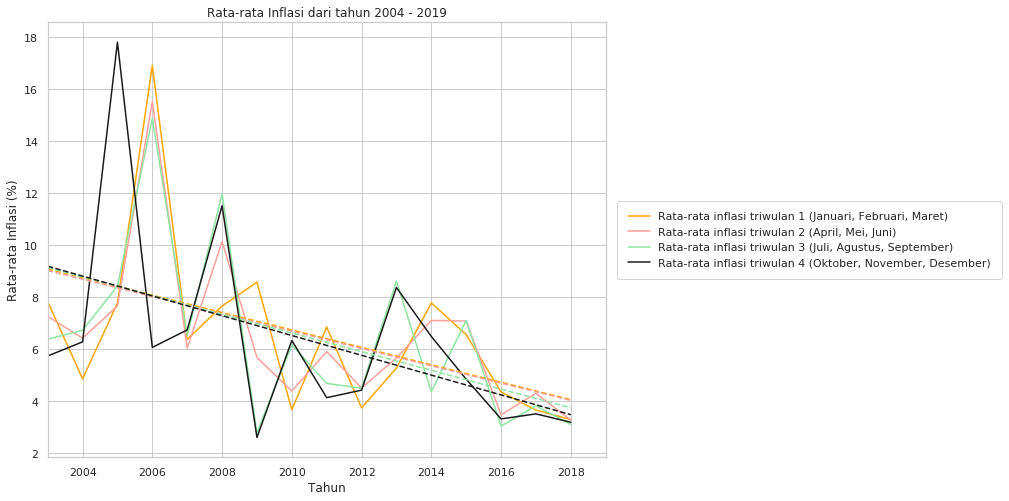

In [13]:
# Memilih beberapa kolom yang diperlukan
data = data[['Month', 'Inflasi(%)']]

data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].map(lambda x: x.year)
data['Month'] = data['Month'].map(lambda x: x.month)

# Pengelompokan bulan berdasarkan triwulan
# Triwulan pertama (Januari, Februari, Maret)
# Triwulan kedua (April, Mei, Juni)
# Triwulan ketiga (Juli, Agustus, September)
# Triwulan keempat (Oktober, Nopember, Desember)

def get_triwulan(mounth):
    if mounth >= 1 and mounth <= 3:
        return 'triwulan1'
    elif mounth >= 4 and mounth <= 6:
        return 'triwulan2'
    elif mounth >= 7 and mounth <= 9:
        return 'triwulan3'
    else:
        return 'triwulan4'

# Rentang tahun yang digunakan 
# Tahun 2002 tidak digunakan karena hanya mengandung bulan Desember saja 
# Padahal analisis triwulan berdasarkan 3 bulan 

min_year = 2003
max_year = 2019
years = range(min_year, max_year)

# Menambahkan kolom triwulan

data['triwulan'] = data['Month'].apply(get_triwulan)

triwulan1 = []
triwulan2 = []
triwulan3 = []
triwulan4 = []

for year in years:
    years_data = data[data['Year'] == year]
    triwulan1.append(years_data[years_data['triwulan'] == 'triwulan1']['Inflasi(%)'].mean())
    triwulan2.append(years_data[years_data['triwulan'] == 'triwulan2']['Inflasi(%)'].mean())
    triwulan3.append(years_data[years_data['triwulan'] == 'triwulan3']['Inflasi(%)'].mean())
    triwulan4.append(years_data[years_data['triwulan'] == 'triwulan4']['Inflasi(%)'].mean())

# Regresi Linier
pred_triwulan1, b1_triwulan1, b0_triwulan1 = reg(years, triwulan1)
pred_triwulan2, b1_triwulan2, b0_triwulan2 = reg(years, triwulan2)
pred_triwulan3, b1_triwulan3, b0_triwulan3 = reg(years, triwulan3)
pred_triwulan4, b1_triwulan4, b0_triwulan4 = reg(years, triwulan4)

# Plot
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

f, ax = plt.subplots(figsize=(10, 8))

plt.plot(years, triwulan1, label='Rata-rata inflasi triwulan 1 (Januari, Februari, Maret)', color='orange')
plt.plot(years, triwulan2, label='Rata-rata inflasi triwulan 2 (April, Mei, Juni)', color='r')
plt.plot(years, triwulan3, label='Rata-rata inflasi triwulan 3 (Juli, Agustus, September)', color='g')
plt.plot(years, triwulan4, label='Rata-rata inflasi triwulan 4 (Oktober, November, Desember)', color='k')
plt.plot(years, pred_triwulan1, color='orange', linestyle='--')
plt.plot(years, pred_triwulan2, color='r', linestyle='--')
plt.plot(years, pred_triwulan3, color='g', linestyle='--')
plt.plot(years, pred_triwulan4, color='k', linestyle='--')

plt.xlim(min_year, max_year)

ax.set_ylabel('Rata-rata Inflasi (%)')
ax.set_xlabel('Tahun')
ax.set_title('Rata-rata Inflasi dari tahun 2004 - 2019')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [14]:
print('Perubahan gradien rata-rata inflasi pertahun pada triwulan 1 : %.5f' %b1_triwulan1[0])
print('Perubahan gradien rata-rata inflasi pertahun pada triwulan 2 : %.5f' %b1_triwulan2[0])
print('Perubahan gradien rata-rata inflasi pertahun pada triwulan 3 : %.5f' %b1_triwulan3[0])
print('Perubahan gradien rata-rata inflasi pertahun pada triwulan 4 : %.5f' %b1_triwulan4[0])

Perubahan gradien rata-rata inflasi pertahun pada triwulan 1 : -0.33523
Perubahan gradien rata-rata inflasi pertahun pada triwulan 2 : -0.33298
Perubahan gradien rata-rata inflasi pertahun pada triwulan 3 : -0.35958
Perubahan gradien rata-rata inflasi pertahun pada triwulan 4 : -0.38073


# Analisis Prediktif

### Pembahasan Grafik


> **Regresi Linier** : regresi linier pada rata-rata inflasi triwulan 1, triwulan 2, triwulan 3, dan triwulan 4 menunjukkan trend penurunan seiring bertambahnya tahun atau waktu. 

> **Perubahan gradien** : Rata-rata inflasi setiap triwulan berdasarkan tahun cukup sulit dimengerti jika dilihat secara visual saja. Sehingga berdasarkan regresi linier dapat diketahui perubahan gradien rata-rata inflasi pertahun pada masing-masing triwulan. Perubahan gradien rata-rata inflasi pertahun paling kecil adalah triwulan 4. Hal tersebut menunjukkan bahwa penurunan rata-rata inflasi pertahun paling besar adalah pada triwulan 4. Perubahan gradien tersebut dapat dijadikan acuan untuk **memprediksi** rata-rata inflasi terhadap tahun (waktu) selanjutnya. Mengacu terhadap perubahan gradien, bahwa untuk tahun selanjutnya, **penurunan rata-rata Inflasi(%) paling besar adalah pada triwulan 4**.





In [15]:
data.head()

,Month,Inflasi(%),Year,triwulan
0,6,3.28,2019,triwulan2
1,5,3.32,2019,triwulan2
2,4,2.83,2019,triwulan2
3,3,2.48,2019,triwulan1
4,2,2.57,2019,triwulan1


# Nilai Korelasi

> Berdasarkan grafik rata-rata inflasi(%) per tahun dengan waktu (tahun), tampak bahwa regresi linier menunjukkan kemiringan negatif. Sehingga dapat menggunakan koefisien korelasi untuk menentukan hubungan linier kedua variabel tersebut. Namun, koefisien korelasi disini, hanya menjelaskan kekuatan hubungan tanpa memperhatikan hubungan sebab akibat. 

> Pada analisis grafik tersebut, digunakan korelasi pearson, karena terdapat hubungan linier dari dua variabel. Namun apabila bila data mengandung banyak data pencilan dan non linier maka dapat digunakan korelasi Spearman. 

> **Nilai korelasi pearson** pada tabel menunjukkan bahwa **nilai negatif** korelasi pearson hanya mengindikasikan bahwa pengingkatan variabel tahun tidak sebanding dengan peningkatan variabel rata-rata inflasi **(antagonis)**. Sehingga nilai korelasi negatif tidak digunakan untuk menentukan ukuran sebuah nilai. 

Berdasarkan uji korelasi pearson, kekuatan korelasi variabel **inflasi(%)** dengan variabel **Year** yaitu **0.493550**	yang mengindikasikan korelasi cukup (0,25-0,50) Selain itu, nilai korelasi ini juga merupakan nilai korelasi tertinggi jika dibandingkan dengan 2 variabel yang berbeda lainnya. Seperti **Inflasi(%) dengan Month** dan **Month dengan Year** 






In [16]:
data.corr(method='pearson')

,Month,Inflasi(%),Year
Month,1.000000,-0.014544,-0.059602
Inflasi(%),-0.014544,1.000000,-0.493550
Year,-0.059602,-0.493550,1.000000


## Analisis Deskriptif

In [17]:
# Tabel A

print (data.describe(include='all'))

             Month  Inflasi(%)         Year   triwulan
count   199.000000  199.000000   199.000000        199
unique         NaN         NaN          NaN          4
top            NaN         NaN          NaN  triwulan2
freq           NaN         NaN          NaN         51
mean      6.437186    6.314724  2010.713568        NaN
std       3.473540    3.316154     4.807755        NaN
min       1.000000    0.000000  2002.000000        NaN
25%       3.000000    3.855000  2007.000000        NaN
50%       6.000000    6.040000  2011.000000        NaN
75%       9.000000    7.285000  2015.000000        NaN
max      12.000000   18.380000  2019.000000        NaN


In [18]:
# Median inflasi mulai Desember 2002 sampai Juni 2019
data['Inflasi(%)'].median()

6.04

In [19]:
# Modus inflasi mulai Desember 2002 sampai Juni 2019
data['Inflasi(%)'].mode()

0    4.53
1    4.61
2    6.29
3    7.15
4    7.32
dtype: float64

### Pembahasan Analisis Deskriptif

Pada analisis deskriptif sesuai tabel A menunjukkan bahwa tabel data telah dilakukan perhitungan dengan fungsi :

> **mean** : merupakan rata-rata dari setiap kolom. Pada kolom bulan, dilakukan perubahan ke dalam bentuk angka (datetime). Informasi mean pada kolom Month dan Year tidak memiliki makna, karena data bulan dan tahun merupakan bentuk time series. Analisis deskriptif mean yang memiliki makna adalah 'Inflasi(%)' yang bernilai **6.314724**. 

> **std** : merupakan fungsi yang digunakan untuk mencari nilai standar deviasi. Standar deviasi digunakan untuk mengetahui apakah sampel data yang diambil mewakili seluruh populasi data, selain itu standar deviasi digunakan untuk mengetahui penyimpangan antara data sampel dengan rata-ratanya. Semakin besar nilai standar deviasi yang didapatkan maka menunjukkan semakin besar juga penyimpangannya. Sehingga, semakin kecil nilai standar deviasi maka akan semakin baik, karena akan semakin kecil penyimpangannya. Standar deviasi yang memiliki makna adalah standar deviasi kolom 'Inflasi(%)' yaitu **3.316154**. 

> **min & max** : Fungsi min & max digunakan untuk mengetahui range (jarak) data atau nilai maksmimum dan nilai minimum data. Nilai minimum inflasi (%) adalah 0 dan nilai maksmimumnya adalah 18.380000. Sedangkan data time yaitu data pada kolom 'Month' memiliki nilai minimum 1 (Januari) dan nilai maksimum 12 (Desember) serta 'Year' memiliki nilai minimum 2002 dan nilai maksimum 2019. 

> **count** : Fungsi count digunakan untuk menentukan jumlah baris data observasi yang tidak kosong pada kolom. Fungsi ini penting untuk mengecek apakah jumlah baris pada kolom satu dengan lainnya sama atau tidak, karena pada data time series bila jumlah baris pada kolom inflasi(%) dengan kolom Month dan Year tidak sama, maka perlu dilakukan pemilahan data terlebih dahulu. Namun berdasarkan analisis deskriptif didapatkan jumlah baris pada masing-masing kolom sama yaitu **199** sehingga tidak perlu lagi dilakukan pemilahan data. 

> **unique** : fungsi unique digunakan untuk menghitung jumlah string pada kolom yang berbeda, sehingga tipe data numerik tidak dilakukan perhitungan. Hasil analisis deskriptif fungsi unique menunjukkan kolom triwulan memiliki 4 karakter string yang berbeda yaitu triwulan1, triwulan2, triwulan3, dan triwulan4.














